### A set of scripts to simulate landscape evolution of a scarp over a desired timescale

To implement:
 - Non-linear and soil diffusion 

### User defined options

In [17]:
DEM_name = 'DEMs/Ridgecrest2.asc' # set name of your DEM here 
total_time = 1000 # set total time of simulation in years here, code will output diffused scarp over that timescale
file_name_export = 'eroded_DEMs/Ridgecrest2_eroded.asc' # set name of output synthetic DEM here

### Import Python packages and Landlab tools

In [26]:
import numpy as np
from pylab import show, figure, plot
import time
from landlab import RasterModelGrid
from landlab.plot.imshow import imshow_grid
from landlab.io import read_esri_ascii
import matplotlib.pyplot as plt
from osgeo import gdal
import glob
from PIL import Image
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import LightSource
from landlab.io.obj import write_obj
from landlab.components import LinearDiffuser,DepthDependentDiffuser,TaylorNonLinearDiffuser,DepthDependentTaylorDiffuser
from landlab.io.esri_ascii import write_esri_ascii

### load DEM 

/Users/adminalba/anaconda3/envs/scarp_erosion/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


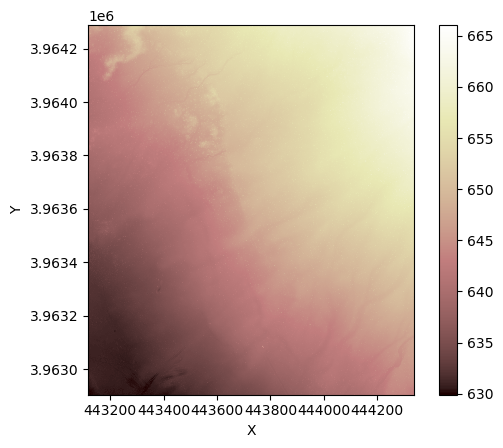

In [19]:
# load DEM -- uses some landlab commands
mg, z = read_esri_ascii(DEM_name, name='topographic__elevation')
np.all(mg.at_node['topographic__elevation'] == z)
mg.set_fixed_value_boundaries_at_grid_edges(False, True, False, True)
mg.set_closed_boundaries_at_grid_edges(True, False, True, False)
hillshade = mg.calc_hillshade_at_node(elevs=z, alt=30., az=100.)
imshow_grid(mg,z) # plot_type, 'Hillshade'
slope_t0 = mg.calc_slope_at_node(z)
z_t0 = z[mg.nodes]

### Define 2D diffusion set-up

We define our transport rate and 2D diffusion set-up (using linear diffusion)

In [20]:
D = 0.001  # m2/yr transport coefficient (0.001 for Basin and Range)
dt = 0.2 * mg.dx * mg.dx / D # set time step to 5 yrs
mg.set_closed_boundaries_at_grid_edges(True, True, True, True)
len(mg.core_nodes)
qs = mg.add_zeros('sediment_flux', at='link')

5.0


### Simulate diffusion

In [21]:
n_iter = int(total_time/dt)

for p in range(n_iter):
    g = mg.calc_grad_at_link(z)
    qs[mg.active_links] = -D * g[mg.active_links]
    dzdt = -mg.calc_flux_div_at_node(qs)
    z[mg.core_nodes] += dzdt[mg.core_nodes] * dt

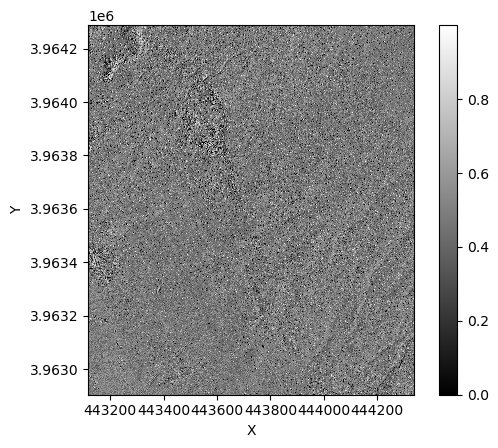

In [22]:
# option to visualize and double check 
imshow_grid(mg,hillshade,cmap='gray')
plt.title(total_time)

### Export synthetic DEM after diffusion

as an ascii file

In [25]:
write_esri_ascii(file_name_export, mg)

'eroded_DEMs/Ridgecrest2_eroded.asc'